In [1]:
%load_ext autoreload
%autoreload 2

Read raw signal from Arduino (but actually synthetic)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from heartbeat.heartbeat_sensor.heartbeat_sensors import SimulatedHeartbeatSensor
from heartbeat.heartbeat_sensor.signal_processing import SignalProcessor
np.random.seed(42)

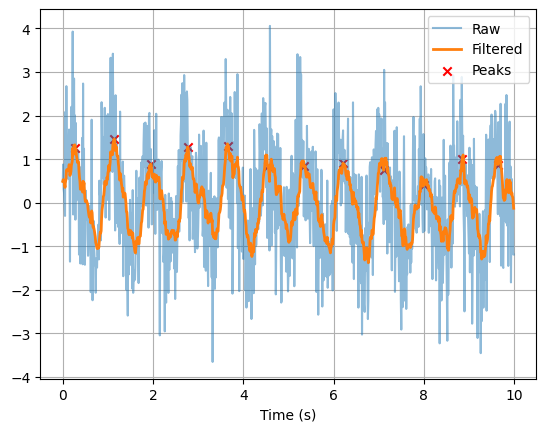

In [26]:
sensor = SimulatedHeartbeatSensor(variability=1)
processor = SignalProcessor(filter_update_interval=50)  # Update filter every 50 samples

duration = 10  # seconds
sampling_rate = sensor.sampling_rate
n_samples = duration * sampling_rate

raw_signals = []
filtered_signals = []

for i in range(n_samples):
    signal = sensor.read_signal()
    raw_signals.append(signal)
    processor.update_signal(signal)
    filtered_signals.append(processor.get_filtered_value_ema())
    if (i + 1) % 10 == 0:
        peaks = processor.detect_peaks(filtered_signals)

filtered_signals = np.array(filtered_signals)
t = np.arange(n_samples) / sampling_rate
plt.plot(t, raw_signals, label='Raw', alpha=0.5)
plt.plot(t, filtered_signals, label='Filtered', linewidth=2)
plt.scatter(t[peaks], filtered_signals[peaks], color='red', label='Peaks', marker='x')
plt.xlabel('Time (s)') 
plt.legend(loc='upper right')
plt.grid(True)
plt.show()